**Francis O'Hara**

Fall 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Analyzing the results of PCA

In this task, you will apply PCA to the Iris dataset and analyze properties of the PCA representation.

### 3a. Import Iris data

In the cell below:
- load in the Iris dataset into a pandas DataFrame.
- select all numeric headers (i.e. drop `species`).
- Print out the head (only showing the first 5 data samples).

You should see (with better formatting):

```
	sepal_length	sepal_width	petal_length	petal_width
0	5.1	3.5	1.4	0.2
1	4.9	3.0	1.4	0.2
2	4.7	3.2	1.3	0.2
3	4.6	3.1	1.5	0.2
4	5.0	3.6	1.4	0.2
```

In [78]:
iris_df = pd.read_csv("data/iris.csv").iloc[:, :-1]
print(iris_df.head())


   sepalLength  sepalWidth  petalLength  petalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


### 3b. Apply PCA to Iris

You should make the following plots:
1. Elbow plot of cumulative variance accounted for by first $k$ principal components.
2. Written description of your choice of number of PCs preserved and why.
3. Visualization (plot) of PCA projected data on 1st two PCs.

You should normalize the dataset when performing your PCA projection.

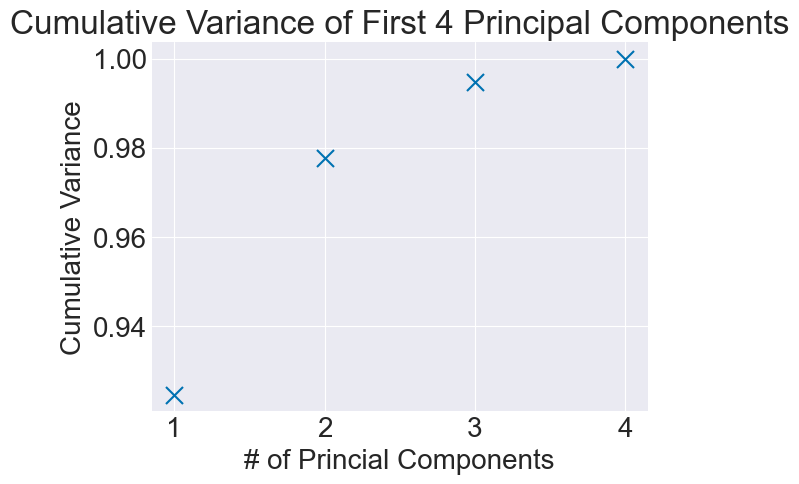

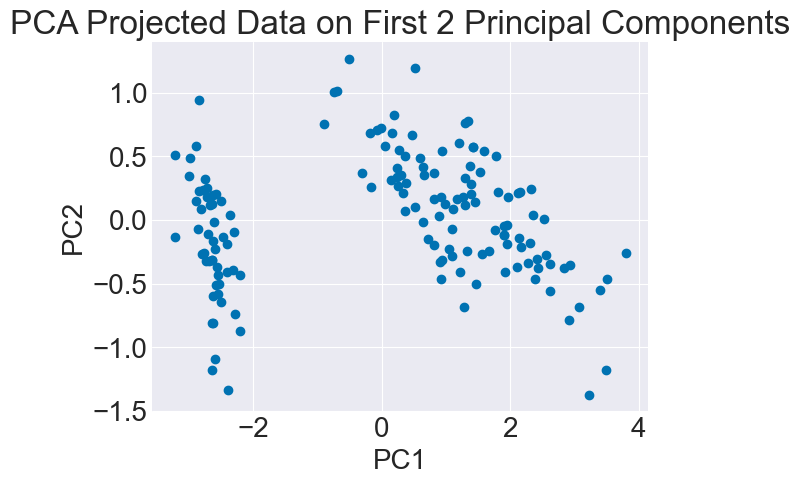

In [79]:
iris_pca = pca.PCA(iris_df)
iris_pca.fit(iris_df.columns)

e_vecs = iris_pca.get_eigenvectors()
e_vals = iris_pca.get_eigenvalues()
prop_var = iris_pca.compute_prop_var(e_vals)
cum_var = iris_pca.compute_cum_var(prop_var)
iris_pca.elbow_plot()
plt.show()

iris_project = iris_pca.pca_project([0, 1])
plt.plot(iris_project[:, 0], iris_project[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Projected Data on First 2 Principal Components")
plt.show()

Based on the elbow plot above, I choose to preserve the only the first two principal components as they account for more than 90% of the data.

### 3c. Dropping different pairs of principal components

In the cell below, create a "high quality" 2x2 subplots grid of scatter plots that drops different consecutive PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [3, 4]
- (top-right) PCs [2, 3]
- (bottom-left) PCs [4, 1]
- (bottom-right) PCs [1, 2]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legible.

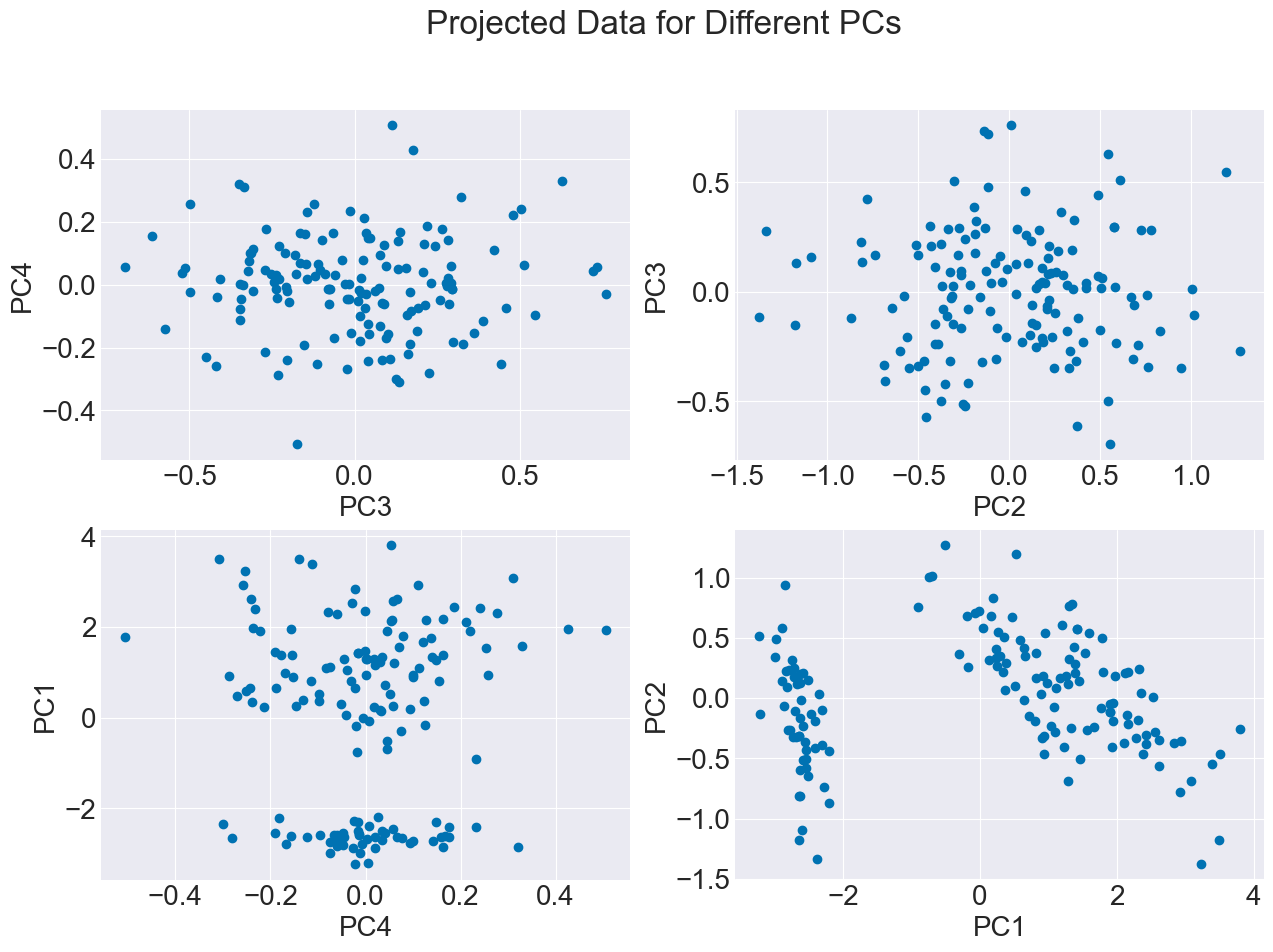

In [80]:
fig, axs = plt.subplots(2, 2)

ax2pc  = {(0, 0): [2,3], (0, 1):[1, 2], (1, 0):[3, 0], (1,1):[0, 1]}

for row in range(2):
    for col in range(2):
        iris_project = iris_pca.pca_project(ax2pc[(row, col)])
        axs[row][col].plot(iris_project[:, 0], iris_project[:, 1], 'o' )
        axs[row][col].set_xlabel(f'PC{ax2pc[(row, col)][0] + 1}')
        axs[row][col].set_ylabel(f'PC{ax2pc[(row, col)][1] + 1}')
fig.suptitle("Projected Data for Different PCs")
fig.set_figwidth(15)
fig.set_figheight(10)
plt.show()

### 3d. Questions

**Question 8:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 8:**  
The best results seem to appear (i.e. the general pattern of variation in the data is more visible) when the more important principal components are used as opposed to when the less important principal components are used.

### 3e. Reconstruct data based on PCs

In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space. Then in the cell below, create a scatter plot of the two data variables `sepal_length` (x), `sepal_width` (y) of the Iris data **without any normalization**.

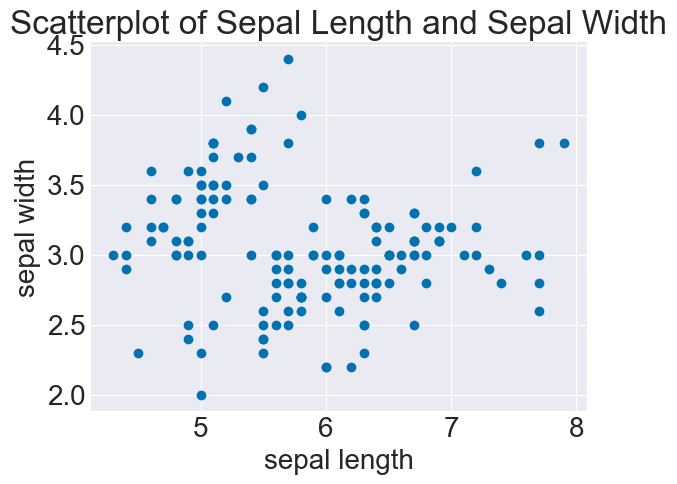

In [81]:
plt.scatter(iris_df["sepalLength"], iris_df["sepalWidth"])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("Scatterplot of Sepal Length and Sepal Width")
plt.show()

In the cell below, apply PCA on the Iris dataset **without any normalization** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepal_length`, `sepal_width` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.

If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your `sepal_length`, `sepal_width` plot created one cell above — including the data range and center).

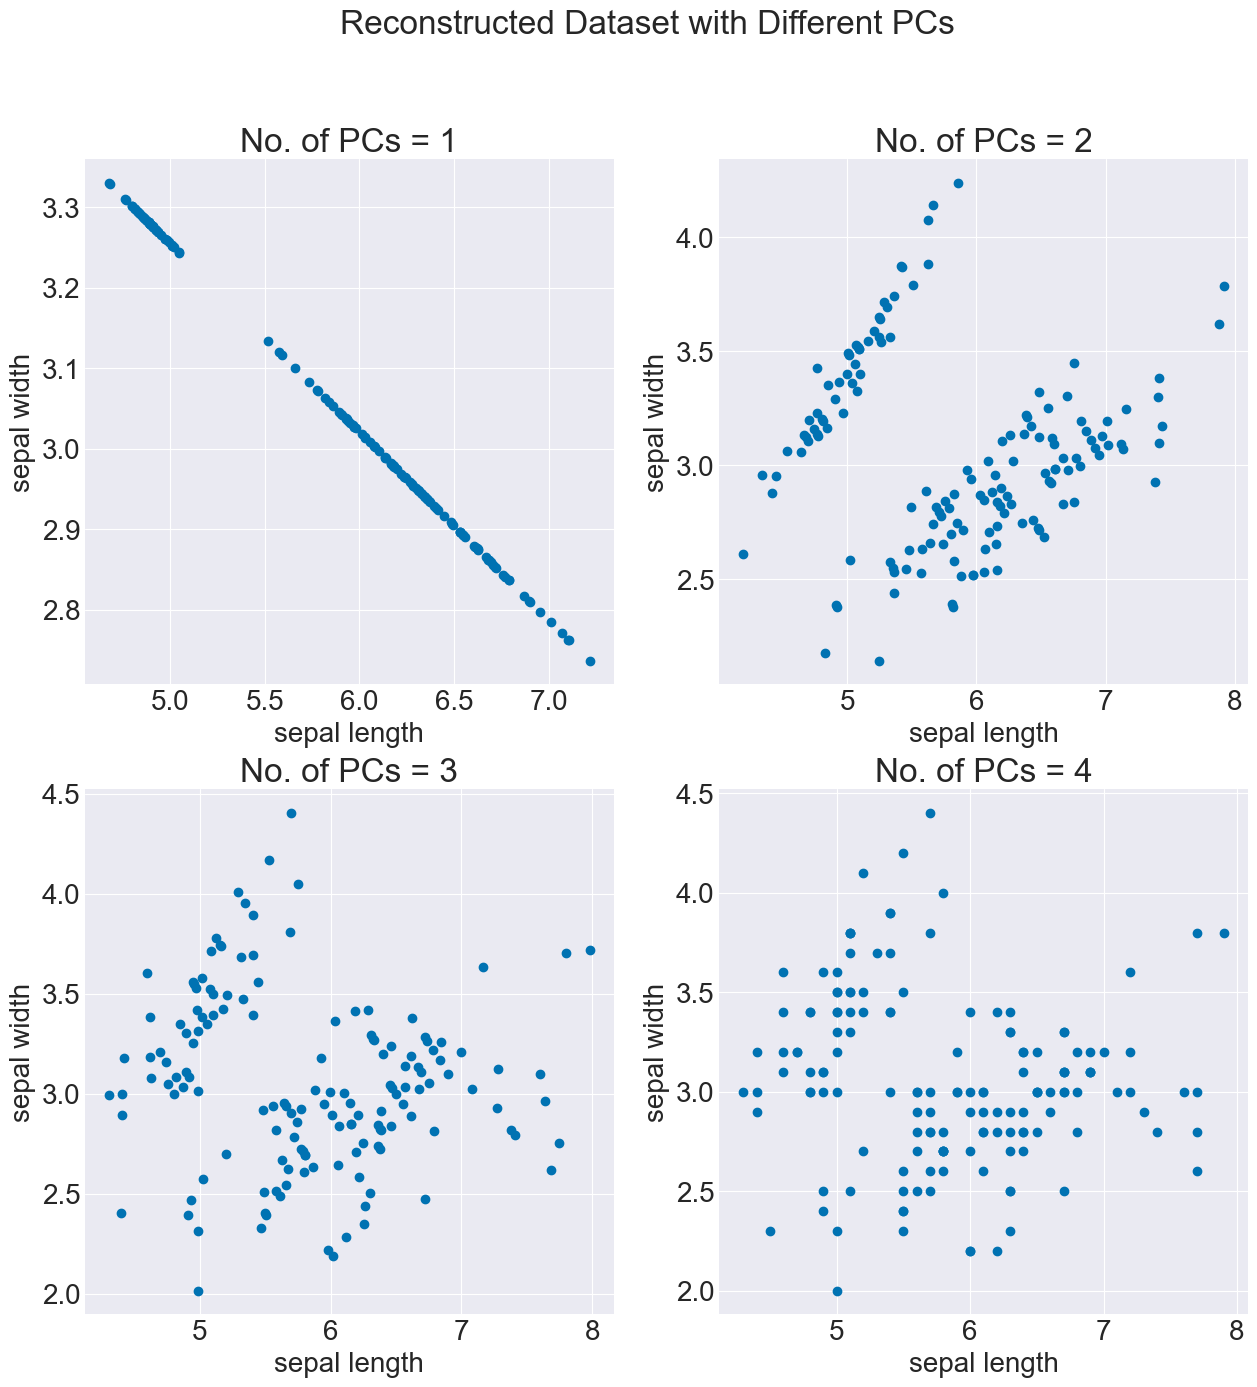

In [94]:
iris_pca = pca.PCA(iris_df)
iris_pca.fit(iris_df.columns)

fig, axs = plt.subplots(2, 2)
top_k = 1

for row in range(2):
    for col in range(2):
        iris_pca.pca_project(range(len(iris_pca.e_vals)))
        result = iris_pca.pca_then_project_back(top_k)
        axs[row][col].scatter(result[:, 0], result[:, 1])
        axs[row][col].set_xlabel("sepal length")
        axs[row][col].set_ylabel("sepal width")
        axs[row][col].set_title(f"No. of PCs = {top_k}")
        top_k += 1

fig.suptitle("Reconstructed Dataset with Different PCs")
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

### 3f. Questions

**Question 9:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 9:**  
As the number of principal components used for each re-projection increases, more properties of the original data get preserved. This is demonstrated by the fact that the scatterplots of the reprojections look more and more like the scatterplot of the original dataset as the principal components are increased from 1 (top left) to 4 (bottom right)

### 3g. Implement loading plot

To visualize how the top two principal components relate to original data variables, implement `loading_plot` in `pca.py`.

### 3h. Questions

**Question 10:** Call your `loading_plot` method to generate a loading plot of the Iris dataset. What do the loadings tell us what the first two PCs measure specifically, with respect to the original data variables?

**Question 11:** What specific correlations among original data variables do the loadings help us identity?

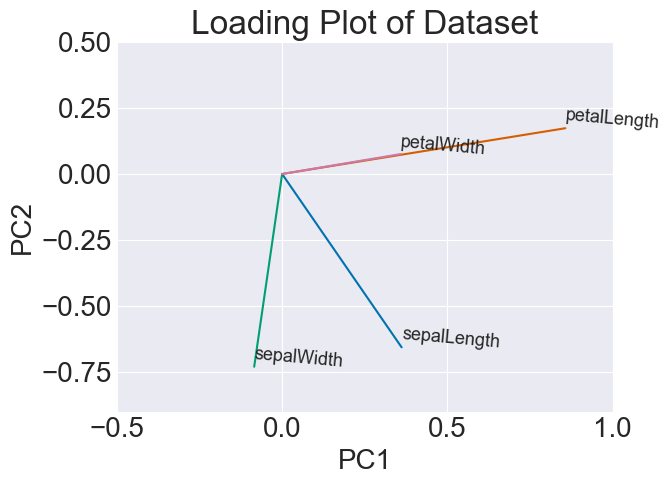

In [127]:
iris_pca.loading_plot()

**Answer 10:**  
From the loading plot, we can tell that Petal Length, Petal Width and Sepal Width seem to capture most of the variation in the data as their lines in the loading plot travel the furthest along PC1 (the most relevant principal component).
We can also tell that PC1 captures more of the variation from thee Petal Length, and Petal Width and a little bit of the variation from Sepal Length but does not capture as muchc of the variation in the Sepal Width.
PC2 on the other hand captures most of the variation in Sepal Width and some of the variation in Sepal Length, but it does not capture a lot of the variation in the data from Petal Width and Petal Length.

**Answer 11:**  
The most prominent correlation identifiable from the loading plot is that of the Petal Width and the Petal Length as they both move in the same direction and are therefore strongly positively correlated. Sepal length also seems to be  positively correlated with Petal Width and Petal Length as they both move in the same direction along PC1. Sepal Width also seems to be slightly negatively correlated with Sepal Length, Petal Width, and Petal Length.